### **What is a Simple Neural Network?**

* A simple neural network is a foundational deep learning model inspired by the structure of the human brain. 

* It's an algorithm that "learns" to make predictions by identifying patterns in data. 

* A neural network is composed of interconnected nodes, or "neurons," organized into layers.

The network has three main types of layers:

  1. **Input Layer:** This is where your data enters the network. 
     * Each node in this layer represents a feature in your dataset. 
     * For example, if you are predicting house prices, the input nodes might represent features like the number of bedrooms, square footage, or location.

  2. **Hidden Layer(s):** These are the intermediate layers between the input and output. 
     * The hidden layers perform computations on the data they receive from the previous layer. 
     * A neural network can have one or more hidden layers.

  3. **Output Layer:** This layer produces the final prediction or result. 
     * The number of nodes in this layer depends on the problem you are trying to solve. 
     * For a binary classification problem (e.g., yes/no), the output layer might have a single node. 
     * For a multi-class classification problem (e.g., classifying handwritten digits from 0 to 9), it will have multiple nodes.

- Each connection between neurons has a **weight**, which determines the strength of the connection. 

- The network learns by adjusting these weights during the training process. 

- A **bias** is an additional parameter added to each neuron, allowing the model to fit a wider range of data.

---

![Simple Neural Network](https://media.datacamp.com/legacy/v1725638284/image_bd3b978959.png)

Simple Neural Network Architecture

Image Source: [DataCamp](https://medium.com/@kisetzuu/multilayer-perceptrons-mcp-for-nonlinear-classification-a-case-study-on-handwritten-digit-2925b5d41908)

---

### **The Learning Process: Step-by-Step**

The process of training a neural network involves two main phases that are repeated over many iterations:

1.  **Forward Propagation:**
    * Data from the input layer is passed through the network, one layer at a time.
    * Each neuron in a hidden layer receives input from all neurons in the previous layer. This input is a weighted sum of the previous layer's outputs.
    * An **activation function** is then applied to this weighted sum to produce the neuron's output. The activation function introduces non-linearity, which allows the network to learn complex relationships in the data. A common activation function is the Sigmoid function, which squashes the output to a range between 0 and 1.
    * This process continues until the data reaches the output layer, which generates a prediction.

2.  **Backpropagation:**
    * The network's prediction is compared to the actual, known value (the "truth"). The difference between the predicted and actual value is called the **error** or **loss**.
    * The **loss function**, such as Mean Squared Error (MSE) for regression or Cross-Entropy for classification, measures the model's performance.
    * The goal is to minimize this error. Backpropagation is the process of adjusting the weights of the network, starting from the output layer and working backward, to reduce the error.
    * A **learning rate** is a hyperparameter that determines how much the weights are adjusted in each iteration. A smaller learning rate means smaller adjustments, leading to slower but more stable learning.

By repeating these steps over many **epochs** (a full pass through the entire training dataset), the neural network iteratively refines its weights and biases, improving the accuracy of its predictions.

---

### **Customer Tier Classification Using a Simple Neural Network**

* This notebook demonstrates how to build and train a simple neural network to perform a multiclass classification. 

* We will classify customer data (`customer_data.csv`) into four distinct tiers: Bronze, Silver, Gold, and Platinum.

#### **1. The Multiclass Classification Problem**

* In contrast to binary classification, which predicts one of two outcomes (e.g., churn or no churn), multiclass classification deals with more than two classes. 

* Our problem aims to predict a customer's loyalty tier based on their behavior. This is a common task in marketing and business intelligence.

#### **2. Setting up the Environment and Loading the Dataset**

* We will set the environment and import the necessary libraries. 
* We will then load the dataset that mimics real-world customer data. 
* The features will include `average_spend`, `login_frequency`, and `product_reviews`. 
* The target variable, `customer_tier`, will have four possible integer values (0, 1, 2, 3) representing our four classes.

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('customer_data.csv')

# Display the first few rows of the dataframe
df.head()

,average_spend,login_frequency,product_reviews,customer_tier
0,593.083172,19,43,1
1,1428.535744,25,22,3
2,1111.391216,5,40,2
3,918.054802,8,10,1
4,276.227029,7,41,1


In [ ]:
# Separate features (X) and target (y)
X = df[['average_spend', 'login_frequency', 'product_reviews']].values
y = df['customer_tier'].values

# Normalize the features for optimal training
# In other words, scale (flatten) the input
X = X / X.max(axis=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Check the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2400, 3), (600, 3), (2400,), (600,))

#### **3. Building the Multiclass Neural Network**

* This neural network is similar to the binary classification model but with a key difference in the output layer. 

* Instead of a single neuron with a sigmoid activation, we will use a layer with 4 neurons (one for each class) and a Softmax activation function.

**Key Components:**

* **Hidden Layer (`Dense(10, activation='relu')`):** This layer learns complex patterns from the input data. The `relu` activation function ensures non-linearity, which is essential for solving non-trivial problems.
* **Output Layer (`Dense(num_classes, activation='softmax')`):** This layer has as many neurons as there are classes (in our case, 4). The `softmax` activation function converts the raw output scores into a probability distribution. The sum of all output probabilities will equal 1, making it easy to interpret the model's confidence for each class.
* **Loss Function (`sparse_categorical_crossentropy`):** This is the standard loss function for multiclass classification problems. It calculates the error between the predicted probabilities and the true integer labels. It is `sparse` because our labels are single integers (0, 1, 2, 3), not one-hot encoded vectors.

In [8]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(3,), activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2912 - loss: 1.3611
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4283 - loss: 1.3064
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5096 - loss: 1.2529
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6217 - loss: 1.1950
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6421 - loss: 1.1351
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6567 - loss: 1.0800
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6629 - loss: 1.0321
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6667 - loss: 0.9918
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6767 - loss: 0.9572
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6825 - loss: 0.9273
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6908 - loss: 0.9008
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy:

#### **4. Evaluating the Multiclass Model**

* Evaluation on the test set is crucial to understand the model's generalization capabilities. 

* The output will show the model's loss and accuracy on unseen data.

In [9]:
# Evaluate the model and print the results
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8467 - loss: 0.4465
Test Loss: 0.4465
Test Accuracy: 0.8467


#### **5. Visualizing the Confusion Matrix**

* The confusion matrix for a multiclass problem is an $N 	x N$ matrix, where $N$ is the number of classes. 

* It provides a detailed breakdown of correct and incorrect predictions for each class.

In [15]:
# Make predictions on the test set and display the predicted probabilities
y_pred_probs = model.predict(X_test)

# Display the first 5 predictions)
y_pred_probs[:5]  

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[4.14922179e-05, 8.13478327e-05, 7.03831017e-01, 2.96046078e-01],
       [2.44800791e-01, 7.51125097e-01, 1.16457231e-03, 2.90956162e-03],
       [2.67399009e-04, 5.51238947e-04, 5.84923029e-01, 4.14258301e-01],
       [1.15135886e-01, 8.27898324e-01, 5.69421537e-02, 2.35756415e-05],
       [4.61891294e-01, 5.37098289e-01, 9.81056364e-04, 2.94588026e-05]],
      dtype=float32)

In [20]:
# Convert probability predictions to class labels
y_pred_labels = [int(np.argmax(i)) for i in y_pred_probs]

# Display the first 5 predicted class labels
print(y_pred_labels[:5])

[2, 1, 2, 1, 1]


In [21]:
# Create and display the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[ 25,  42,   2,   2],
       [  7, 178,   5,   2],
       [  0,   4, 181,   7],
       [  4,   7,  10, 124]], dtype=int32)>

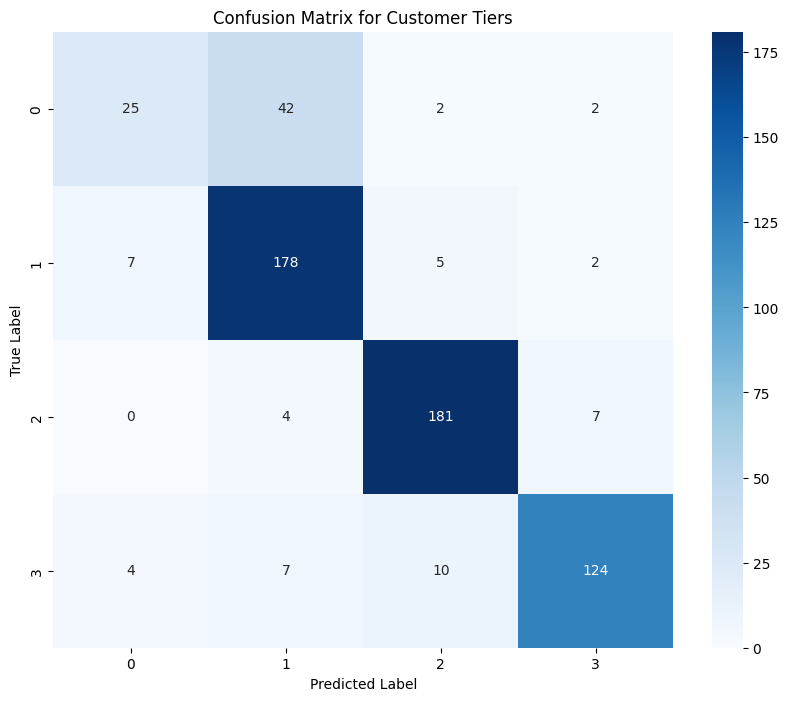

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Customer Tiers')
plt.show()

**Interpreting the Confusion Matrix:**

* The diagonal values represent the number of correct predictions for each class. For example, the top-left value shows how many Bronze-tier customers were correctly classified as Bronze. 

* The off-diagonal values indicate misclassifications. For instance, a value in the first row, second column would show how many Bronze-tier customers were incorrectly classified as Silver-tier.

### Summary

* The Simple Neural Network was trained to classify a `customer_data.csv` dataset into four tiers (Bronze, Silver, Gold, and Platinum).

* Training Performance: Over 100 epochs, the model's accuracy on the training data improved, reaching approximately 86.46% in the final epochs.

* Test Performance: When evaluated on the unseen test data, the model achieved a final test accuracy of 84.67% with a loss of 0.4465.

* Confusion Matrix: The confusion matrix provides a detailed breakdown of the model's predictions:

  * Tier 0 (Bronze): Out of 71 actual Bronze customers, only 25 were correctly classified. The majority, 46, were misclassified as Silver.

  * Tier 1 (Silver): The model was most accurate with this tier, correctly classifying 178 out of 192 customers.

  * Tier 2 (Gold): The model performed well, correctly classifying 181 out of 192 Gold customers.

  * Tier 3 (Platinum): The model correctly classified 124 out of 145 Platinum customers.

* Simple Neural Networks are useful for learning complex patterns from data to make predictions or classifications. 

* They provide a foundational model for tackling various supervised learning problems, from recognizing images to forecasting trends.

---

*Deep Learning - Python Notebook* by *[*Prakash Ukhalkar*](https://github.com/prakash-ukhalkar)*